In [1]:
import sys
import os
import keras
from keras.models import Model
from keras.callbacks import EarlyStopping
import math
import warnings
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.models import Sequential
from keras.models import load_model
from keras.utils.vis_utils import plot_model
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

Using TensorFlow backend.
/Users/pbalapra/miniconda3/envs/covid-19/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/pbalapra/miniconda3/envs/covid-19/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/pbalapra/miniconda3/envs/covid-19/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/U

In [2]:
def process_data(train, test, lags):

    scaler = MinMaxScaler(feature_range=(0, 1)).fit(train.reshape(-1, 1))
    #scaler = StandardScaler().fit(train.reshape(-1, 1))
    #scaler = RobustScaler().fit(train.reshape(-1, 1))
    flow1 = scaler.transform(train.reshape(-1, 1)).reshape(1, -1)[0]
    flow2 = scaler.transform(test.reshape(-1, 1)).reshape(1, -1)[0]
    

    train, test = [], []
    for i in range(lags, len(flow1)):
        train.append(flow1[i - lags: i + 1])
    for i in range(lags, len(flow2)):
        test.append(flow2[i - lags: i + 1])

    train = np.array(train)
    test = np.array(test)
    #np.random.shuffle(train)

    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = test[:, :-1]
    y_test = test[:, -1]

    return X_train, y_train, X_test, y_test, scaler

In [3]:
df = pd.read_csv('../data/2018_1hourdata.csv')
X = df['EASH_WASH_in'].values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
lag = 12
X_train, y_train, X_test, y_test, scaler = process_data(train, test, lag)

In [4]:
X_train.shape

(6996, 12)

In [5]:
X_train1 = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_train1.shape

(6996, 1, 12)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU

In [7]:
# Simple RNN

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


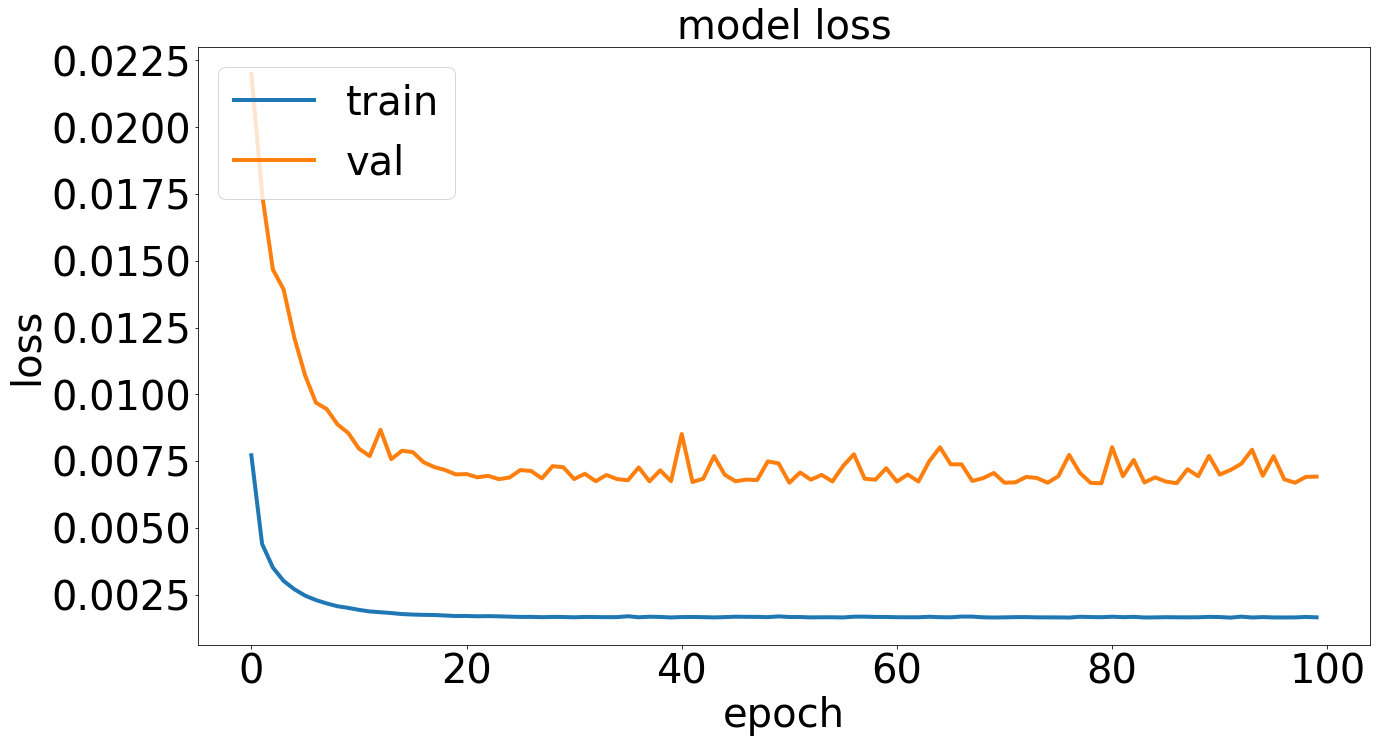

In [8]:
model = tf.keras.Sequential()
model.add(SimpleRNN(4, input_shape=(1, lag)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist=model.fit(X_train1, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=0)
plt.figure(figsize=(21, 11))
plt.plot(hist.history['loss'], linewidth=4)
plt.plot(hist.history['val_loss'], linewidth=4)
plt.title('model loss', fontsize=40)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.ylabel('loss', fontsize=40)
plt.xlabel('epoch', fontsize=40)
plt.legend(['train', 'val'], loc='upper left', fontsize=40)
plt.show()

In [9]:
# LSTM

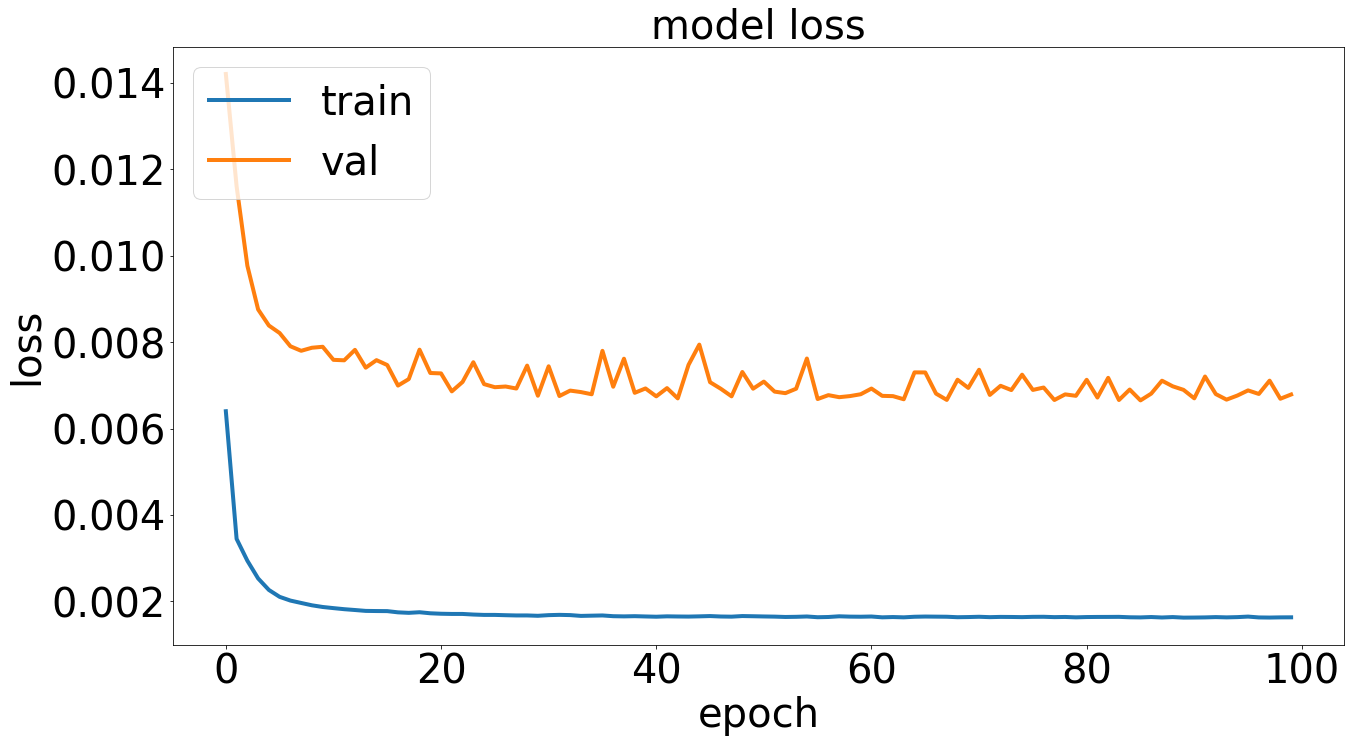

In [10]:
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, lag)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist=model.fit(X_train1, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=0)
plt.figure(figsize=(21, 11))
plt.plot(hist.history['loss'], linewidth=4)
plt.plot(hist.history['val_loss'], linewidth=4)
plt.title('model loss', fontsize=40)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.ylabel('loss', fontsize=40)
plt.xlabel('epoch', fontsize=40)
plt.legend(['train', 'val'], loc='upper left', fontsize=40)
plt.show()

In [11]:
# GRU

In [ ]:
model = tf.keras.Sequential()
model.add(GRU(4, input_shape=(1, lag)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist=model.fit(X_train1, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=0)
plt.figure(figsize=(21, 11))
plt.plot(hist.history['loss'], linewidth=4)
plt.plot(hist.history['val_loss'], linewidth=4)
plt.title('model loss', fontsize=40)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.ylabel('loss', fontsize=40)
plt.xlabel('epoch', fontsize=40)
plt.legend(['train', 'val'], loc='upper left', fontsize=40)
plt.show()